In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy
from matplotlib import colors

import FAIRStream

In [2]:
# csv pool folder directory
csv_pool_path = '/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/csv_pool'
# current experiment working directory
work_dir = '/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp'

In [3]:
# initiate a FAIRStream object instance for BSI project
bsi_stream = FAIRStream.FAIRStream(work_dir)
# take a look at dictionaries in engineer's hands
#bsi_stream.engineer.csv_source_dict
bsi_stream.engineer.variable_dict

Success: Querier has initiated a csv source dictionary in:/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp/meta_data/csv_source_dict_demo.json
Success: Querier has initiated a variable dictionary in:/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp/meta_data/variable_dict_demo.json
Unable to read sql source dictionary. Use Querier.update_sql_source_dict() to build one.


{'__uid': {'src_names': ['id', 'ID', 'subject_id', 'subject_id'],
  'label': 'unique subject id for current study',
  'unique_per_sbj': True},
 '__time': {'src_names': ['tsa', 'tsa', 'timeMinutes', 'timeMinutes'],
  'label': 'time since admission',
  'unit': 'minute'},
 '__anchor': {'src_names': ['True_positive', 'True positive'],
  'label': 'anchor for an episode',
  'unique_per_sbj': False,
  'factor': {'levels': {'__neg_nbc': ['0', '0.0', 'nan'],
    '__pos': ['1', '1.0']},
   'impute_per_sbj': {'nan_level': '__neg_nbc'}}},
 'y': {'output': True,
  'src_names': ['True_positive', 'True positive'],
  'label': 'Event outcome result',
  'unique_per_sbj': False,
  'factor': {'levels': {'neg_nbc': ['0', '0.0', 'nan'], 'pos': ['1', '1.0']},
   'impute_per_sbj': {'nan_level': 'neg_nbc'}}},
 'txp': {'input': True,
  'src_names': ['Confirmed Txp'],
  'label': 'Transplant recipient',
  'unique_per_sbj': True,
  'factor': {'levels': {'no': ['0', '0.0', 'nan'], 'yes': ['1', '1.0']},
   'impute_p

In [4]:
# define an episode (notice that the engineer now has new attributes)
bsi_stream.engineer.DefineEpisode(input_time_len=2*24*60, # using vital signs and labs 4 days prior to a culture 
                                  output_time_len=24*60, # predict one time unit into the future
                                  time_resolution=60, # aggregate minutely data to one row per hour 
                                  time_lag=0,  # no time lag between predictors and response
                                  anchor_gap=7*24*60) # the minimum distance between two episodes

 
Success! An episode is defined to 
--- use 2880 minute(s) long input variables 
--- predict 1440 minute(s) response variables into the future
--- lag 0 minute(s) between predictors and responses
--- increase by every 60 minute(s)
--- last at most 10080 minute(s) long
Success! Engineer has updated attributes --- episode. 


In [5]:
# Build MVTS dataframe or tfds  (notice that the engineer now has new attributes)
bsi_stream.engineer.BuildMVTS(csv_pool_path, 
                              nsbj = 50, # number of subjects / patients to sample from the pool 
                              replace=True,
                              valid_frac = 0.2, # fraction of number of subjects in validation dataset
                              test_frac = 0, # fraction of number of subjects in left-out test dataset
                              batch_size = 64, # batch size (usually 32,64,128..)
                              impute_input='median', # imputation on predictors
                              impute_output='median' )# imputation on response (no need in BSI project)

# please see the end of console 
# # --- Success! Engineer has updated attributes --- train_df_imputed, valid_df_imputed and test_df_imputed. 
# # --- Success! Engineer has updated attributes --- train_tfds, valid_tfds and test_tfds. 

Success!  50 out of 5671 subjects are sampled from csv pool of size 26093 !
--- fix upper boundary for age by nan
--- fix lower boundary for age by nan
--- fix upper boundary for temp by 50.0
--- fix lower boundary for temp by 50.0
--- fix upper boundary for heart_rate by nan
--- fix lower boundary for heart_rate by nan
--- fix upper boundary for resp_rate by nan
--- fix lower boundary for resp_rate by nan
--- fix upper boundary for spo2 by nan
--- fix lower boundary for spo2 by nan
--- fix upper boundary for x_hr_rr by nan
--- fix lower boundary for x_hr_rr by nan
--- fix upper boundary for s_hr by nan
--- fix lower boundary for s_hr by nan
--- fix upper boundary for s_rr by nan
--- fix lower boundary for s_rr by nan
--- fix upper boundary for s_so2 by nan
--- fix lower boundary for s_so2 by nan
--- fix upper boundary for systolic_blood_pressure by 249.0
--- fix lower boundary for systolic_blood_pressure by 54.0
--- fix upper boundary for diastolic_blood_pressure by 150.0
--- fix lowe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.894737
y___pos        0.105263
dtype: float64
--- prepare episodes for uva_6523
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.897436
y___pos        0.102564
dtype: float64
--- prepare episodes for uva_7999
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.9
y___pos        0.1
dtype: float64
--- prepare episodes for uva_2426
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.902439
y___pos        0.097561
dtype: float64
--- prepare episodes for uva_3177
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.904762
y___pos        0.095238
dtype: float64
--- prepare episodes for uva_4189
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.906977
y___pos        0.093023
dtype: float64
--- prepare episodes for uva_5574
Success! Outpu

In [6]:
bsi_stream.engineer.info()


----------------------------- Engineer Attributes List ------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'input_vars', 'output_vars', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds', 'valid_tfds', 'test_tfds']

------------------------------------- Inputs  --------------------------------- 

['txp___yes', 'txp___no', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', 'chloride___vital', 'tr

In [7]:
bsi_stream.engineer.train_df.describe()

,txp___yes,txp___no,age___vital,temp___vital,heart_rate___vital,resp_rate___vital,spo2___vital,x_hr_rr___vital,s_hr___vital,s_rr___vital,...,troponin___vital,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___neg_nbc,y___pos,__time_bin,__ep_relative_time,__ep_order
count,142776.000000,142776.00000,142776.000000,76316.000000,45825.000000,42080.000000,44848.000000,41061.000000,45825.000000,42080.000000,...,31417.000000,80335.000000,67025.000000,93189.000000,82264.000000,142776.000000,142776.000000,142776.000000,142776.000000,142776.000000
mean,0.030257,0.96117,58.602622,98.295268,92.482934,22.598492,96.976497,0.230553,4.036894,4.558045,...,0.624635,32.633330,2.300009,28.961651,1.886244,0.871911,0.128089,62.371407,-750.000000,1.176500
std,0.171295,0.19319,16.657619,1.671838,19.667199,7.179132,2.732927,0.198027,3.093936,3.245720,...,2.435861,11.112479,2.254231,23.834256,0.410838,0.334190,0.334190,506.573198,1246.960661,0.557455
min,0.000000,0.00000,15.120965,68.000000,41.161709,5.470924,79.000000,-0.698715,0.000000,0.000000,...,0.020000,19.200000,0.200000,2.000000,0.600000,0.000000,0.000000,-4259.000000,-2880.000000,1.000000
25%,0.000000,1.00000,48.803673,97.500000,78.288889,17.731258,95.496713,0.092463,2.075767,1.949786,...,0.030000,26.200000,1.100000,13.000000,1.600000,1.000000,0.000000,-25.000000,-1815.000000,1.000000
50%,0.000000,1.00000,59.734272,98.200000,90.950164,21.478056,97.525039,0.211081,3.290970,4.072824,...,0.070000,29.600000,1.600000,21.000000,1.900000,1.000000,0.000000,-4.000000,-750.000000,1.000000
75%,0.000000,1.00000,71.130690,99.000000,105.552295,26.370418,99.143364,0.355420,5.017628,6.623859,...,0.230000,34.800000,2.600000,36.000000,2.100000,1.000000,0.000000,17.000000,315.000000,1.000000
max,1.000000,1.00000,90.000000,104.866667,168.179487,70.148799,100.000000,0.931858,42.117348,20.130030,...,27.050000,138.300000,27.000000,194.000000,6.900000,1.000000,1.000000,16477.000000,1380.000000,8.000000


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


ValueError: hist method requires numerical columns, nothing to plot.

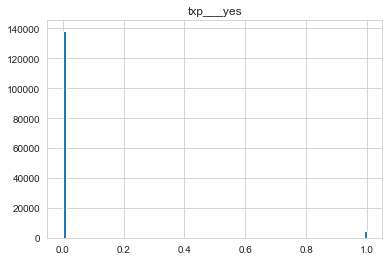

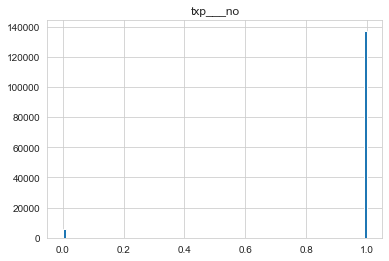

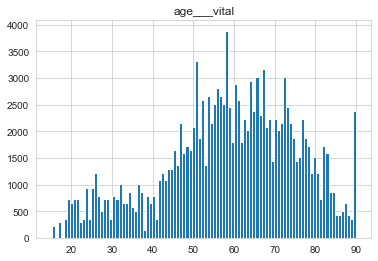

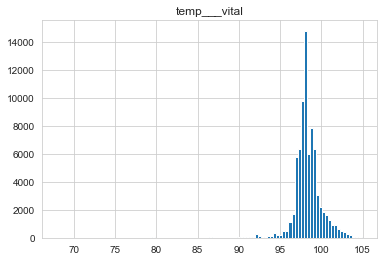

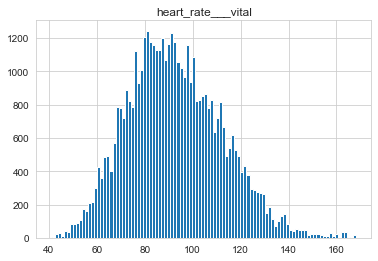

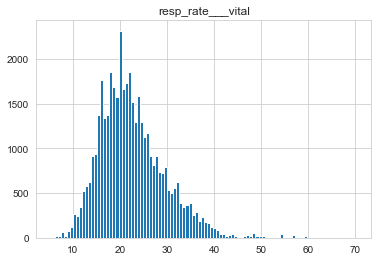

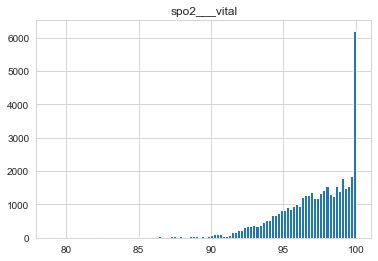

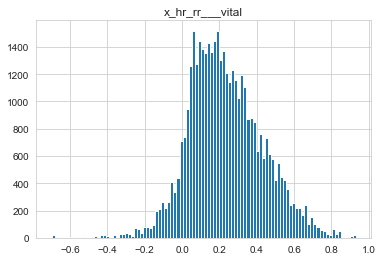

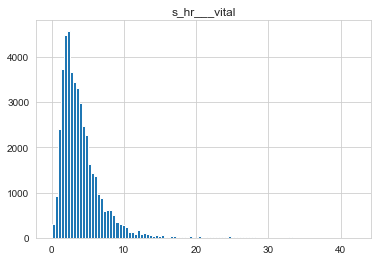

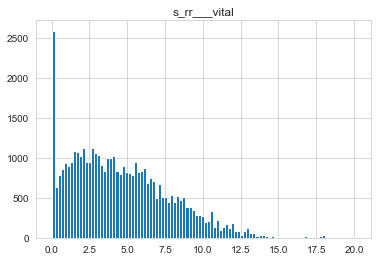

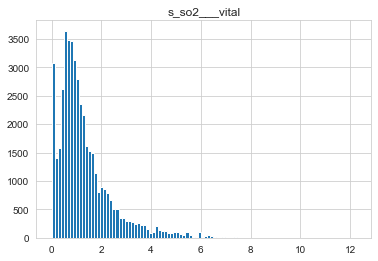

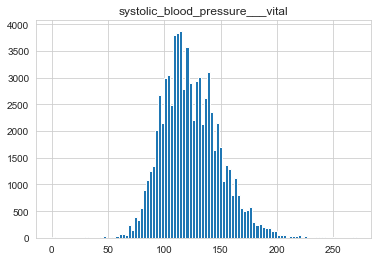

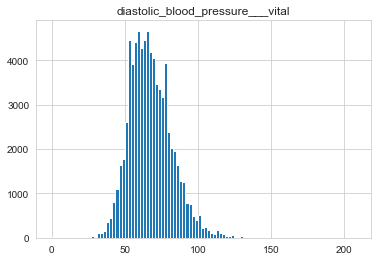

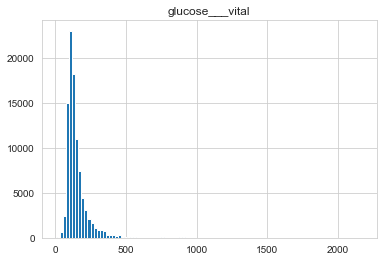

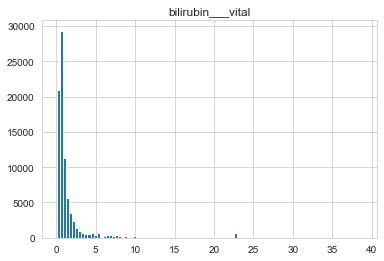

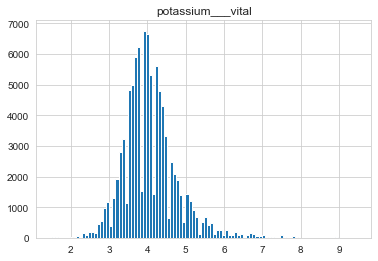

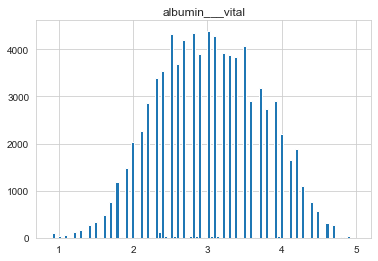

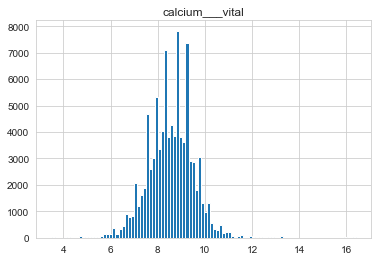

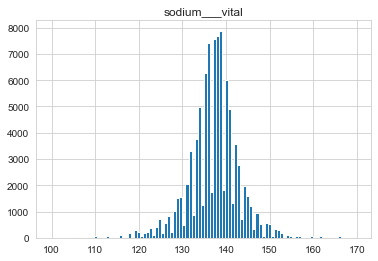

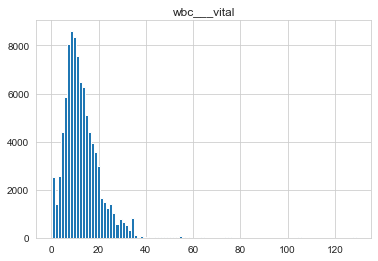

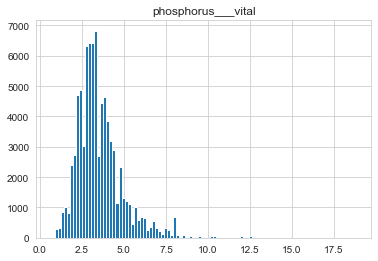

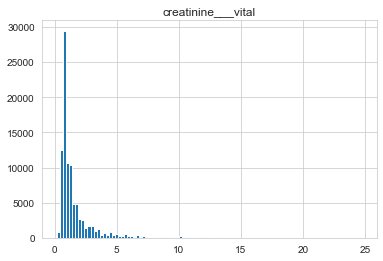

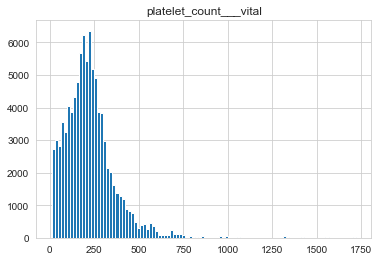

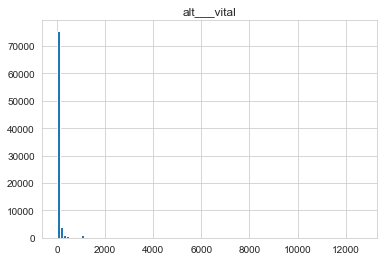

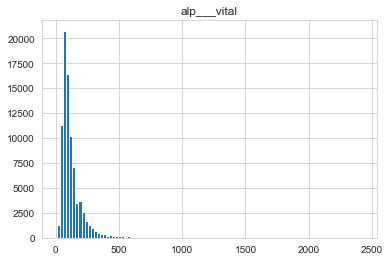

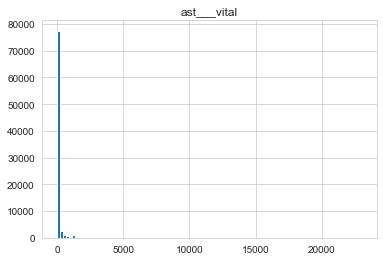

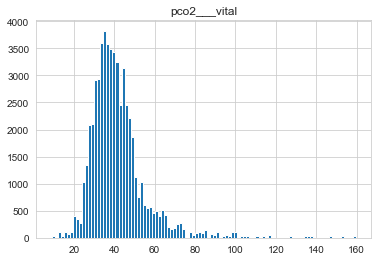

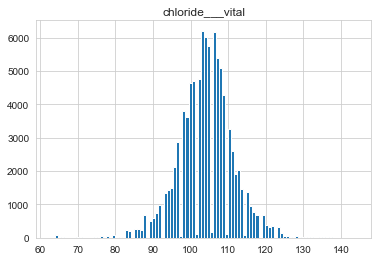

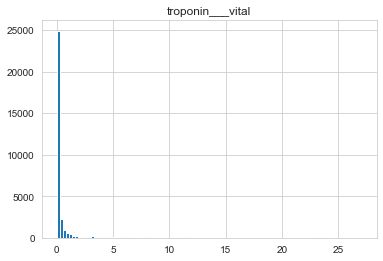

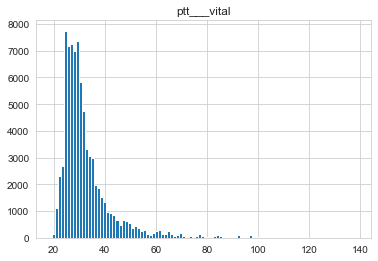

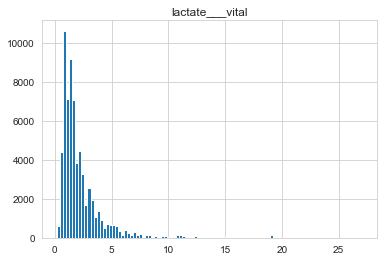

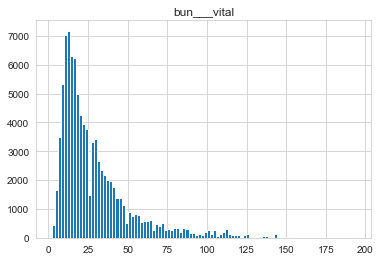

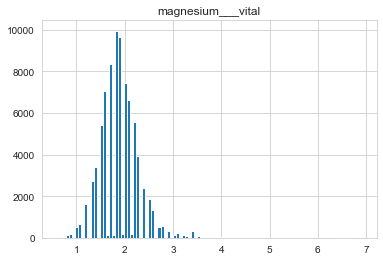

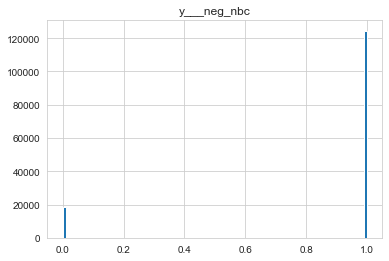

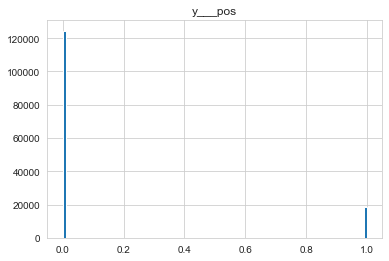

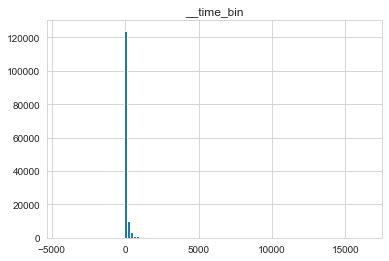

In [8]:
df = bsi_stream.engineer.train_df
for col in df.columns:
    df.hist(column=col, bins=100);

In [9]:
# save raw dataframe in a csv
bsi_stream.engineer.train_df.to_csv("./train_df.csv", index=False)
bsi_stream.engineer.valid_df.to_csv("./valid_df.csv", index=False)


In [10]:
# save median imputed dataframe in a csv
bsi_stream.engineer.train_df_imputed.to_csv("./train_df_median.csv", index=False)
bsi_stream.engineer.valid_df_imputed.to_csv("./valid_df_median.csv", index=False)


In [ ]:
# save 